# 환경설정

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager,rc
# 한글 폰트
font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False  # 유니코드 마이너스 기호 사용

## 주요절차

### 데이터 수집

* 데이터 소스 명시

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. 초기데이터 확인

#### 1-1. 데이터딕셔너리(각 열의 의미, 데이터의 의미해석관련 스펙 또는 메뉴얼) 확인

| 컬럼명             | 데이터 타입   | 설명                                                                            |
| --------------- | -------- | ----------------------------------------------------------------------------- |
| **total\_bill** | float    | 식사 비용 총액 (달러 단위)                                                              |
| **tip**         | float    | 손님이 남긴 팁 금액 (달러 단위)                                                           |
| **sex**         | category | 손님의 성별 <br>• Male: 남성 <br>• Female: 여성                                        |
| **smoker**      | category | 흡연 여부 <br>• Yes: 흡연자 <br>• No: 비흡연자                                           |
| **day**         | category | 요일 (레스토랑 영업일 기준) <br>• Thur: 목요일 <br>• Fri: 금요일 <br>• Sat: 토요일 <br>• Sun: 일요일 |
| **time**        | category | 식사 시간대 <br>• Lunch: 점심 <br>• Dinner: 저녁                                       |
| **size**        | int      | 식사한 그룹의 인원 수                                                                  |


#### 1-2 데이터 기초정보 확인 (사이즈, 열이름, 데이터형)

In [3]:
tips.shape

(244, 7)

In [4]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [5]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### 2. 데이터 정제

#### 2.1. 원본데이터에서 분석가능한 형태로 데이터 전처리 (형변환, 열이름 변경등)

* 해당사항 없어 생략

#### 2.2. 데이터 클리닝:  결측치처리, 이상치 처리

##### 2.2.1 결측치

* 해당사항 없어 생략

#### 2.2.2 이상치

* 이상치 검출

In [7]:
# 수치형 열만 선택
numeric_cols = tips.select_dtypes(include=[np.number]).columns

# 각 열에 대해 z-score 계산
z_scores = np.abs(stats.zscore(tips[numeric_cols]))

# z-score > 3 인 경우를 이상치로 판단
outliers = (z_scores > 3)

# 열별 이상치 개수 집계
outlier_counts = pd.DataFrame({
    "outlier_count": outliers.sum(axis=0),
    "total_count": len(tips),
    "outlier_ratio(%)": outliers.sum(axis=0) / len(tips) * 100
})

print(outlier_counts)

   outlier_count  total_count  outlier_ratio(%)
0              4          244          1.639344
1              3          244          1.229508
2              4          244          1.639344


* 이상치 분석
    * total_bill: 평균에서 크게 벗어난 고액 결제(약 4건).
    * tip: 매우 높은 팁을 준 경우(약 3건).
    * size: 평균보다 인원 수가 큰 테이블(약 4건).
* 이상치 처리 방안
    * 아래 사항은 아웃라이어로 분류되지만 고객 특이 케이스로 해석하는 것이 더 적절해 보이므로 데이터 유지결정

### 3. 초기데이터 분석

#### 3.1 기초통계 정보 확인 (최대값, 최소값, 평균값, 표준편차, 최빈값, 유일값 등)

In [8]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


#### 3.2 수치형 데이터 분포 확인

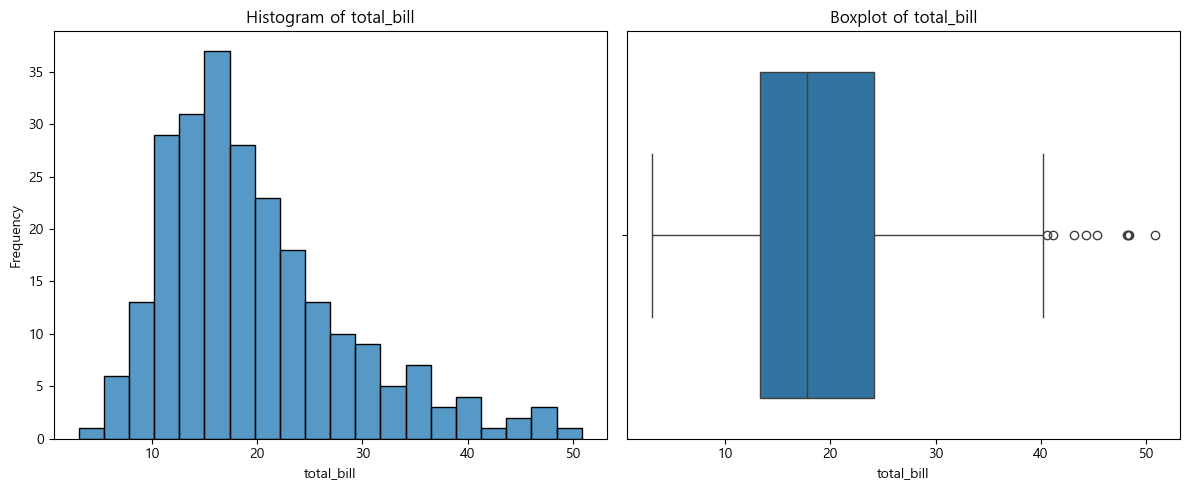

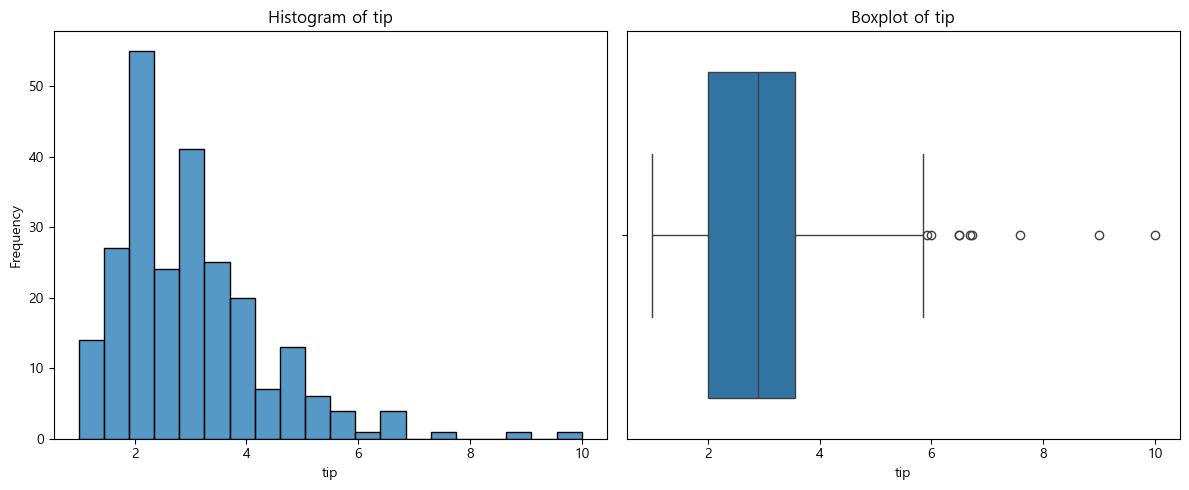

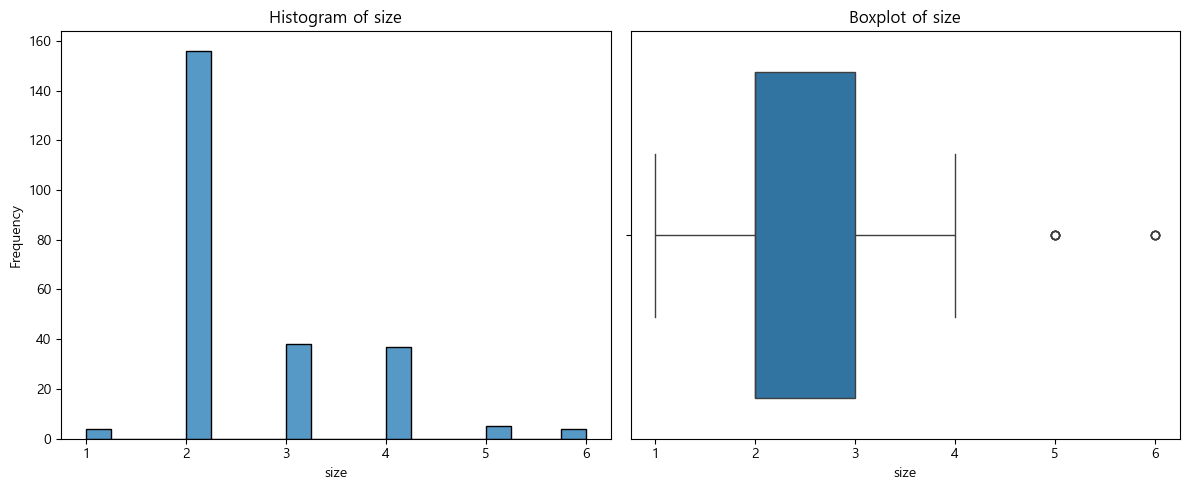

In [9]:
# 수치형 컬럼 선택
numeric_cols = tips.select_dtypes(include=["int64", "float64"]).columns

# 열별로 따로 히스토그램 + 박스플롯 출력
for col in numeric_cols:
    plt.figure(figsize=(12, 5))

    # 히스토그램
    plt.subplot(1, 2, 1)
    sns.histplot(tips[col], bins=20, kde=False)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    # 박스플롯
    plt.subplot(1, 2, 2)
    sns.boxplot(x=tips[col], orient="h")
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

* total bill은 주로 10~20 구간을 중심으로 좌측으로 쏠려있는 정규 분포를 보임
* tip역시 2를 중심으로 좌측으로 쏠려있는 정규 분포를 보임
* 인원수는 2인이 가장 많음

#### 3.3  범주형 데이터 확인

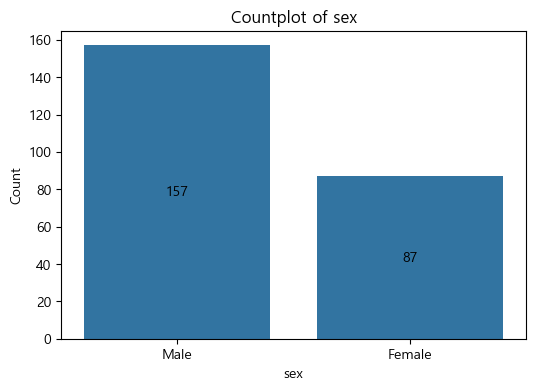

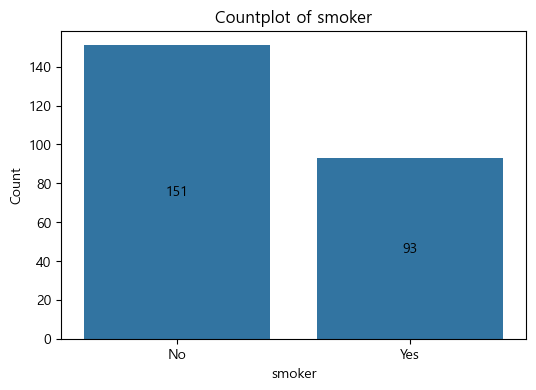

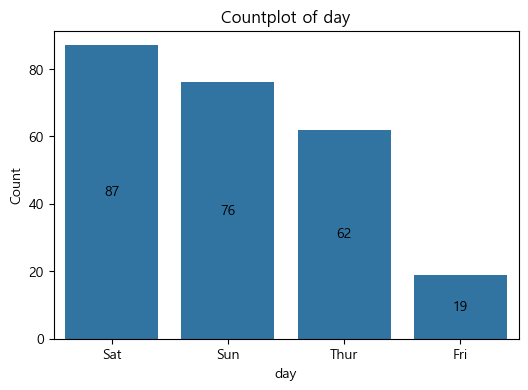

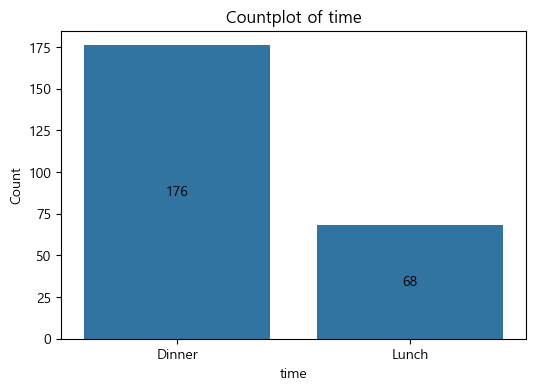

In [10]:
# tips 데이터프레임에서 object(문자열) 또는 category 타입인 열만 뽑아오기
# → 즉, 범주형(카테고리형) 데이터 열만 자동으로 선택
categorical_cols = tips.select_dtypes(include=["object", "category"]).columns

# 선택된 범주형 열들을 하나씩 반복하면서 차트를 그림
for col in categorical_cols:
    # 새로운 그래프 캔버스 생성 (가로 6, 세로 4 크기)
    plt.figure(figsize=(6, 4))

    # Seaborn의 countplot: 해당 열(col)의 각 범주가 몇 번 나오는지 세어서 막대 그래프로 그림
    # order=tips[col].value_counts().index → 빈도수가 많은 순서대로 막대를 정렬
    ax = sns.countplot(data=tips, x=col, order=tips[col].value_counts().index)

    # countplot으로 만든 막대 위/안에 실제 개수 숫자를 표시하기
    # ax.containers 안에는 각 막대 정보가 들어 있음
    for container in ax.containers:
        # label_type="center" → 막대 안쪽에 숫자 표시
        # label_type="edge"   → 막대 위쪽에 숫자 표시
        ax.bar_label(container, label_type="center")

    # 그래프 제목 설정
    plt.title(f"Countplot of {col}")
    # x축 이름 설정
    plt.xlabel(col)
    # y축 이름 설정
    plt.ylabel("Count")

    # 최종 그래프 보여주기
    plt.show()


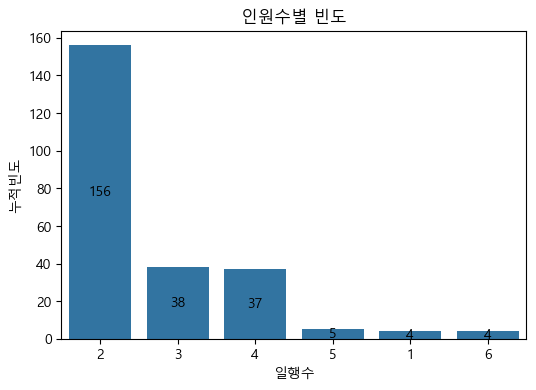

In [11]:
# 인원수(size)별 빈도 확인용 countplot
plt.figure(figsize=(6,4))
ax = sns.countplot(data=tips, x="size", order=tips["size"].value_counts().index)

# 막대 안에 실제 수치 표시
for container in ax.containers:
    ax.bar_label(container, label_type="center")

plt.title("인원수별 빈도")
plt.xlabel("일행수")
plt.ylabel("누적빈도")
plt.show()

#### 3.4 초기 데이터 분석 정리

* 주말(Sat/Sun) & Dinner 데이터가 많아 보임.
* total_bill·tip은 오른쪽 꼬리(고액 소수) 분포.
* 2인 고객이 제일 많음
* 아웃라이어는 특이 사항으로 분석

# 4. 탐색적연구

#### Step1] 데이터 분석을 위한 목적, 대상 또는 주요 가설을 세워본다. 주요가설 도출후 우선순위를 설정한다.

* 가설1] 고액 결제는 주로 저녁 시간에 발생할 것이다.
* 가설2] 인원수가 높을 수록 고액 결제를 할 것이다.
* 가설3] 흡연자일 수록 고액 결제를 할 것이다.

#### Step2] 가설증명: 데이터 재 구조화, 시각화를 통해 새로운 insight 및 정보를 습득 및 가설을 검증한다.

* 가설1] 고액 결제는 주로 저녁 시간에 발생할 것이다.

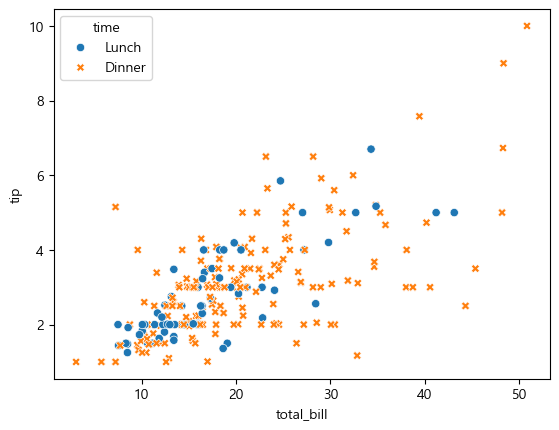

In [12]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue='time', style='time')
plt.show()

* 인사이트
    * 고가의 팁과 총금액은 저녁 타임에서 발생된다.
    * 총금액과 팁은 양의 상관관계를 보여주고 있다.

* 가설2] 인원수가 높을 수록 고액 결제를 할 것이다.

In [14]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="size", size='size')

<Axes: xlabel='total_bill', ylabel='tip'>

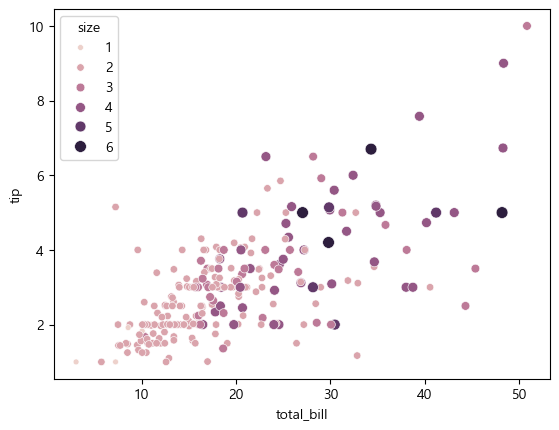

In [15]:
plt.show()

* 인사이트
    * 전체적으로 인원수에 따라 고액 결재를 많이 하나따라 고액 결재를 많이 하나 예외도 존재한다. (최고가, 최고팁은 3인석에서 발견됨)

* 가설3] 흡연자일 수록 고액 결제를 할 것이다.

In [17]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="smoker")

<Axes: xlabel='total_bill', ylabel='tip'>

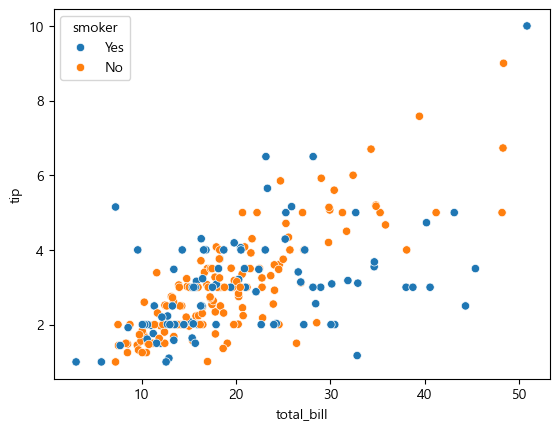

In [18]:
plt.show()

* 인사이트
    * 흡연자와 총결제금액, tip과의 상관관계가 뚜렷히 드러나지 않는다.

#### Step3] 탐색적연구 반복
* 추가 가설 설정 하고 가설의 우선순위를 재조정한다.
* 시간 일정이 허락하는 범위내에서 Step1~Step3를 반복한다.

* 추가 가설1] 요일별 시간대별 매출 상관관계가 존재 할 것으로 보임
* 추가 가설2] 성별에 따른 매출 상관관계가 존재 할 것으로 보임

* 추가 가설1] 요일별 시간대별 매출 상관관계가 존재 할 것으로 보임

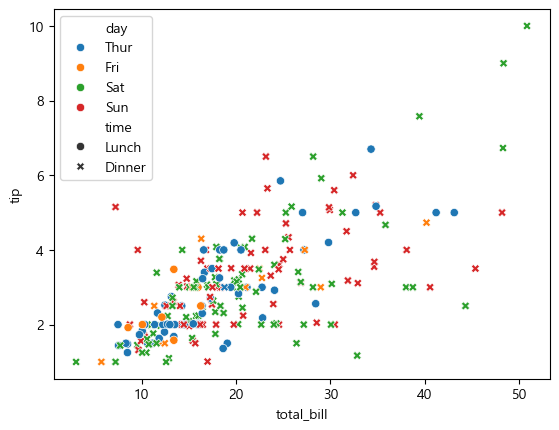

In [20]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day", style="time")
plt.show()

* 인사이트
    * 토요일 저녁시간에 고가의 팁이 발생한다.
    * 주말(토요일, 일요일)에는 외식을 거의 저녁에 한다.
    * 목요일 점심에 총금액 12$ 부근에 응집도가 높다.
    * 목요일은 거의 점심식사를 한다.
    * 금요일은 점심, 저녁식사를 모두 한다.
    * 일요일 저녁에 적은 값에도 큰 팁을 내는 특이한 데이터가 존재한다.

* 추가 가설2] 성별에 따른 매출 상관관계가 존재 할 것으로 보임

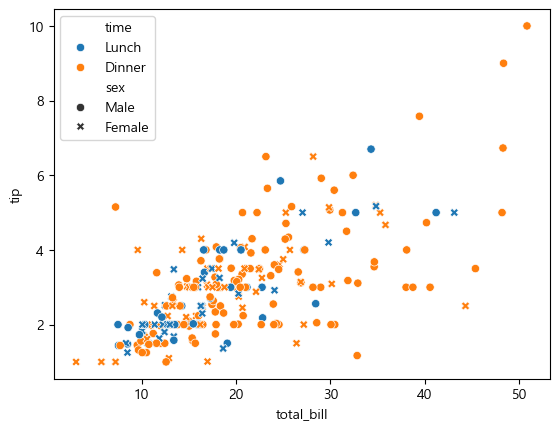

In [24]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time", style="sex")
plt.show()

* 인사이트
    * 최고 매출은 남성 그룹에서 발생되었다.
    * 팁이 높은 비율과 낮은 비율로 보이는 아웃라이어도 남성 그룹에서 발견되었다.

#### Step4] 최종결론: 지금까지 진행했던 모든 탐색적연구의 결과를 반영하여 최종 결론을 내린다.

---

---

# 데이터분석 적용 실습 템플릿

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

## 필요한 모듈 import

## 데이터 수집

In [ ]:
# 데이터 소스를 확보하세요


## 1. 초기데이터 확인

### 1-1. 데이터스키마 확인

#### 각 열의 의미, 데이터의 의미해석관련 스펙 또는 메뉴얼을 확인 가능시 진행 하세요
* A열: A열의 의미를 기술
* B열: B열의 의미를 기술  
...

### 1-2. 데이터 기초정보 확인

* 사이즈, 데이터형, 기초통계항목등을 확인하세요  

In [ ]:
#df.shape
#df.info()

* 기초통계항목

In [ ]:
# df.desribe()

## 2. 데이터 정제

### 2-1. 간단한 데이터 전처리

In [ ]:
# 원본데이터로에서 읽기 가능한 형태로 데이터처리를 하세요. (열이름 변경, 형변환 등)

### 2-2. 데이터 클리닝

In [ ]:
# 결측치, 중복값, 이상치 처리등의 작업을 진행하세요

* 결측치

    - 결측치 열 확인

In [ ]:
# missing_values = df.isnull().any()  
# column_missing_values = missing_values[ missing_values == True ]
# column_missing_values

In [ ]:
# df.isnull().any(axis=1)

* 결측치 보정

In [ ]:
# df['나이'] = df['나이'].fillna(0)

In [ ]:
# df = df.fillna(0)

* 중복값 삭제 (필요시)

In [ ]:
# df[df.duplicated(keep=False)]

In [ ]:
# df.drop_duplicates(inplace=True)

## 3. 초기데이터 분석

### 3.1. 데이터 정제후 데이터스키마 재확인

* 1-2 작업을 다시 해보세요.

### 3.2 데이터 기초정보 정보 확인

* 최대값, 최소값, 평균값, 표준편차, 최빈값, 유일값, 결측치, 이상치 등의 정보를 재확인해 보세요

### 3.3 시각화를 통한 데이터이해 심화

* 데이터의 성격에 따라 이해도를 올리기 위해 시각화가 필요한 데이터차트를 만들어 보세요.  
  (Seaborn 추천: 페어플롯, 막대차트, 파이차트, 라인차트, 히스토그램등..)
  * 범주형: countplot, barplot
  * 단일수치값: histogram, boxplot등
  * 시계열: lineplot
  * 연관관계: pairplot, heatmap
* 시각화한 차트에 대한 분석

# 4. 탐색적연구

#### Step1] 가설: 데이터 분석을 위한 목적, 대상 또는 가설을 세워본다.
* 예) 나이와 월급간에 상관관계가 있을 것이다. (40~60대 사이에서 급여가 가장 높을 것이다)

#### Step2] 가설증명: 데이터 재 구조화, 시각화를 통해 새로운 insight 및 정보를 습득 및 가설을 검증한다. 
* 예) 나이별 월급에 대한 평균값을 구하고 line차트로 시각화하여 추세를 파악하여 가설을 검증한다.

#### Step3] 가설결론: 해당 가설에 대한 결론을 내린다.

#### Step4] 탐색적연구 반복: 시간 일정이 허락하는 범위내에서 Step1~Step3를 반복한다.

#### Step5] 최종결론: 지금까지 진행했던 모든 탐색적연구의 결과를 반영하여 최종 결론을 내린다.
* 개별가설에 대한 인사이트 취합
* 인사이트별 비즈니스 전략 도출
* 추가로 분석하지 못한 항목 및 향후 분석 아이디어등을 명시